In [1]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')


### Comparaison de la consommation de chauffage selon une consigne de température intérieure fixée à 18°C ou 20°C


In [2]:
Simulation_Dataset_T18= {
    "2018": "../../data/simulated_data_7years/T18/2018/Simulation_Outputs",
    "2019": "../../data/simulated_data_7years/T18/2019/Simulation_Outputs",
    "2020": "../../data/simulated_data_7years/T18/2020/Simulation_Outputs",
    "2021": "../../data/simulated_data_7years/T18/2021/Simulation_Outputs",
    "2022": "../../data/simulated_data_7years/T18/2022/Simulation_Outputs",
    "2023": "../../data/simulated_data_7years/T18/2023/Simulation_Outputs",
    "2024": "../../data/simulated_data_7years/T18/2024/Simulation_Outputs"   
}

Weather_Dataset_T18= {
    "2018": "../../data/simulated_data_7years/T18/2018/Weather_Dataset.txt",
    "2019": "../../data/simulated_data_7years/T18/2019/Weather_Dataset.txt",
    "2020": "../../data/simulated_data_7years/T18/2020/Weather_Dataset.txt",
    "2021": "../../data/simulated_data_7years/T18/2021/Weather_Dataset.txt",
    "2022": "../../data/simulated_data_7years/T18/2022/Weather_Dataset.txt",
    "2023": "../../data/simulated_data_7years/T18/2023/Weather_Dataset.txt",
    "2024": "../../data/simulated_data_7years/T18/2024/Weather_Dataset.txt"   
}

Simulation_Dataset_T20= {
    "2018": "../../data/simulated_data_7years/T20/2018/Simulation_Outputs",
    "2019": "../../data/simulated_data_7years/T20/2019/Simulation_Outputs",
    "2020": "../../data/simulated_data_7years/T20/2020/Simulation_Outputs",
    "2021": "../../data/simulated_data_7years/T20/2021/Simulation_Outputs",
    "2022": "../../data/simulated_data_7years/T20/2022/Simulation_Outputs",
    "2023": "../../data/simulated_data_7years/T20/2023/Simulation_Outputs",
    "2024": "../../data/simulated_data_7years/T20/2024/Simulation_Outputs"   
}

Weather_Dataset_T20= {
    "2018": "../../data/simulated_data_7years/T20/2018/Weather_Dataset.txt",
    "2019": "../../data/simulated_data_7years/T20/2019/Weather_Dataset.txt",
    "2020": "../../data/simulated_data_7years/T20/2020/Weather_Dataset.txt",
    "2021": "../../data/simulated_data_7years/T20/2021/Weather_Dataset.txt",
    "2022": "../../data/simulated_data_7years/T20/2022/Weather_Dataset.txt",
    "2023": "../../data/simulated_data_7years/T20/2023/Weather_Dataset.txt",
    "2024": "../../data/simulated_data_7years/T20/2024/Weather_Dataset.txt"   
}


In [3]:
consommation_chauffage_T18 = extract_and_concat_consommation(Simulation_Dataset_T18, column_index=4, prefix="consommation_heat_T18")
consommation_chauffage_T20 = extract_and_concat_consommation(Simulation_Dataset_T20, column_index=4, prefix="consommation_heat_T20")


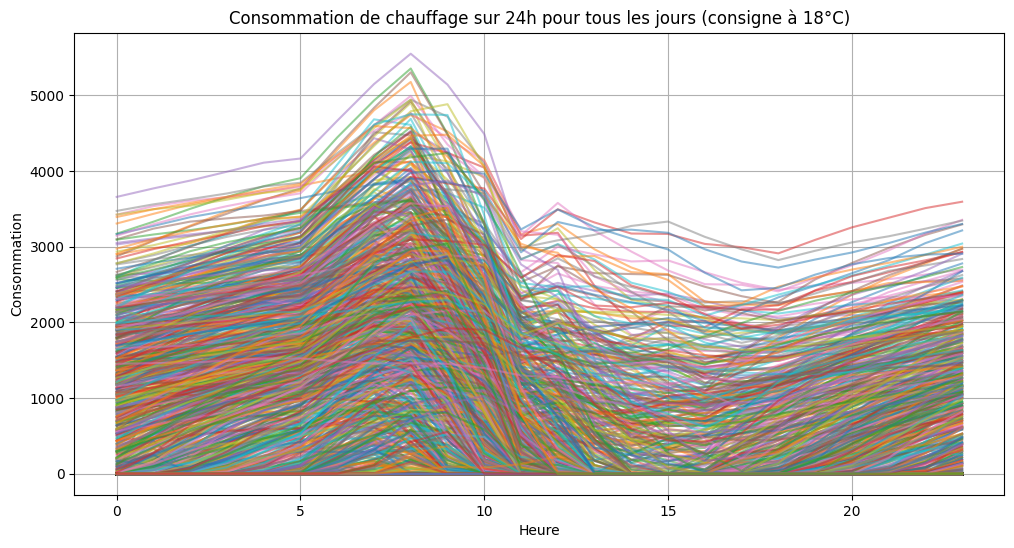

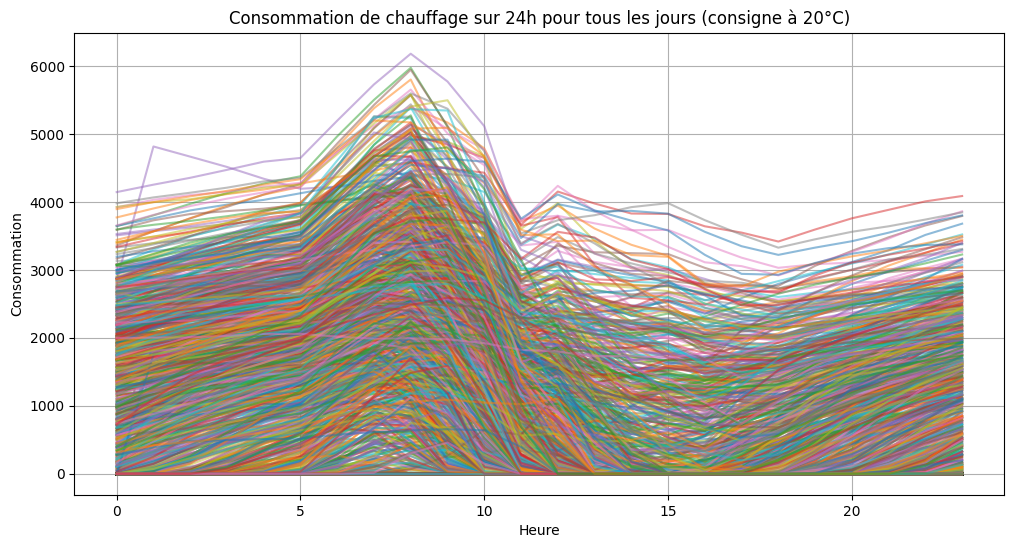

In [11]:
import matplotlib.pyplot as plt

# -------- Consigne à 18°C --------
plt.figure(figsize=(12, 6))
for i in range(len(consommation_chauffage_T18)):
    plt.plot(consommation_chauffage_T18.columns, consommation_chauffage_T18.iloc[i], alpha=0.5)

plt.title("Consommation de chauffage sur 24h pour tous les jours (consigne à 18°C)")
plt.xlabel("Heure")
plt.ylabel("Consommation")
plt.grid(True)
plt.show()

# -------- Consigne à 20°C --------
plt.figure(figsize=(12, 6))
for i in range(len(consommation_chauffage_T20)):
    plt.plot(consommation_chauffage_T20.columns, consommation_chauffage_T20.iloc[i], alpha=0.5)

plt.title("Consommation de chauffage sur 24h pour tous les jours (consigne à 20°C)")
plt.xlabel("Heure")
plt.ylabel("Consommation")
plt.grid(True)
plt.show()


### Période sélectionnée : du 1er novembre au 31 avril


In [12]:
start_date = "2018-01-01"

# Pour T18
dates_T18 = pd.date_range(start=start_date, periods=len(consommation_chauffage_T18), freq="D")
consommation_chauffage_T18.insert(0, "Date", dates_T18)
add_heating_season(consommation_chauffage_T18)
df_conso_T18 = consommation_chauffage_T18[consommation_chauffage_T18["heat"] == 1].drop(columns=["heat"]).copy()

# Pour T20
dates_T20 = pd.date_range(start=start_date, periods=len(consommation_chauffage_T20), freq="D")
consommation_chauffage_T20.insert(0, "Date", dates_T20)
add_heating_season(consommation_chauffage_T20)
df_conso_T20 = consommation_chauffage_T20[consommation_chauffage_T20["heat"] == 1].drop(columns=["heat"]).copy()


In [13]:
clustering_heat_T18,centroids_T18 = clustering(
    df=df_conso_T18.drop(columns=["Date"]),  
    n_parts=1,                          
    status_column="heat_on",           
    n_clusters_list=[3]                
)

clustering_heat_T20,centroids_T20 = clustering(
    df=df_conso_T20.drop(columns=["Date"]),  
    n_parts=1,                          
    status_column="heat_on",           
    n_clusters_list=[3]                
)


In [15]:
centroids_T18 ,centroids_T20

({'clusters_1': array([[1165.40662726, 1328.69492101, 1478.09380949, 1618.07151137,
          1744.27786529, 1845.56966899, 2139.06780392, 2411.99241774,
          2490.90003378, 2028.76932656, 1345.46154332,  546.64437117,
           325.84916028,  168.80944603,  118.15827006,  107.82948313,
           105.10066903,  140.52711494,  182.07090272,  260.05801652,
           350.8974707 ,  463.26370871,  576.13758707,  699.02448903],
         [2034.19407394, 2147.78576685, 2257.63301311, 2362.46990064,
          2459.57750374, 2531.42897428, 2826.10111582, 3110.63087374,
          3305.41705918, 3044.22076413, 2658.26170306, 1907.20415376,
          1816.98600041, 1494.36926202, 1292.17852794, 1240.83188164,
          1168.73715135, 1267.34055608, 1361.16616016, 1543.37880967,
          1701.61123355, 1850.57688449, 1989.98673683, 2118.80709716],
         [  85.6560442 ,  128.26075439,  183.65430497,  262.67431526,
           352.95631827,  444.86208318,  663.48680726,  852.68624595,
    

In [16]:
clustering_heat_T18['Date'] = df_conso_T18['Date'].values
clustering_heat_T20['Date'] = df_conso_T20['Date'].values



Ajouter une colonne `cluster_reel` qui contient, pour chaque profil détecté, un vecteur de 24 valeurs représentant le centroïde exact correspondant.


In [17]:
centroids_array = centroids_T18['clusters_1']

def get_centroid(cluster_label):
    idx = int(cluster_label)
    if idx == 3:
        return [0]*centroids_array.shape[1]  # vecteur nul de 24 valeurs
    return centroids_array[idx].tolist()

clustering_heat_T18['cluster_reel'] = clustering_heat_T18['clusters_1'].apply(get_centroid)

# Vérification
print(clustering_heat_T18[['clusters_1', 'cluster_reel']].head())

# Puis export si besoin
clustering_heat_T18.to_csv("../../data/simulated_data_7years/result_data/clustering_valeur exact_heat_T18_data_from_1_novembre_to_31_avril.csv", index=False)

centroids_array = centroids_T20['clusters_1']

def get_centroid(cluster_label):
    idx = int(cluster_label)
    if idx == 3:
        return [0] * centroids_array.shape[1]  # vecteur nul de 24 valeurs
    return centroids_array[idx].tolist()

clustering_heat_T20['cluster_reel'] = clustering_heat_T20['clusters_1'].apply(get_centroid)

# Vérification
print(clustering_heat_T20[['clusters_1', 'cluster_reel']].head())

# Puis export si besoin
clustering_heat_T20.to_csv("../../data/simulated_data_7years/result_data/clustering_valeur exact_heat_T20_data_from_1_novembre_to_31_avril.csv", index=False)



   clusters_1                                       cluster_reel
0         2.0  [85.65604419633104, 128.26075438515656, 183.65...
1         2.0  [85.65604419633104, 128.26075438515656, 183.65...
2         2.0  [85.65604419633104, 128.26075438515656, 183.65...
3         2.0  [85.65604419633104, 128.26075438515656, 183.65...
4         3.0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
   clusters_1                                       cluster_reel
0         0.0  [1541.6499511472148, 1722.6154008280046, 1879....
1         0.0  [1541.6499511472148, 1722.6154008280046, 1879....
2         2.0  [165.93487007943926, 241.9876195966906, 332.52...
3         2.0  [165.93487007943926, 241.9876195966906, 332.52...
4         2.0  [165.93487007943926, 241.9876195966906, 332.52...


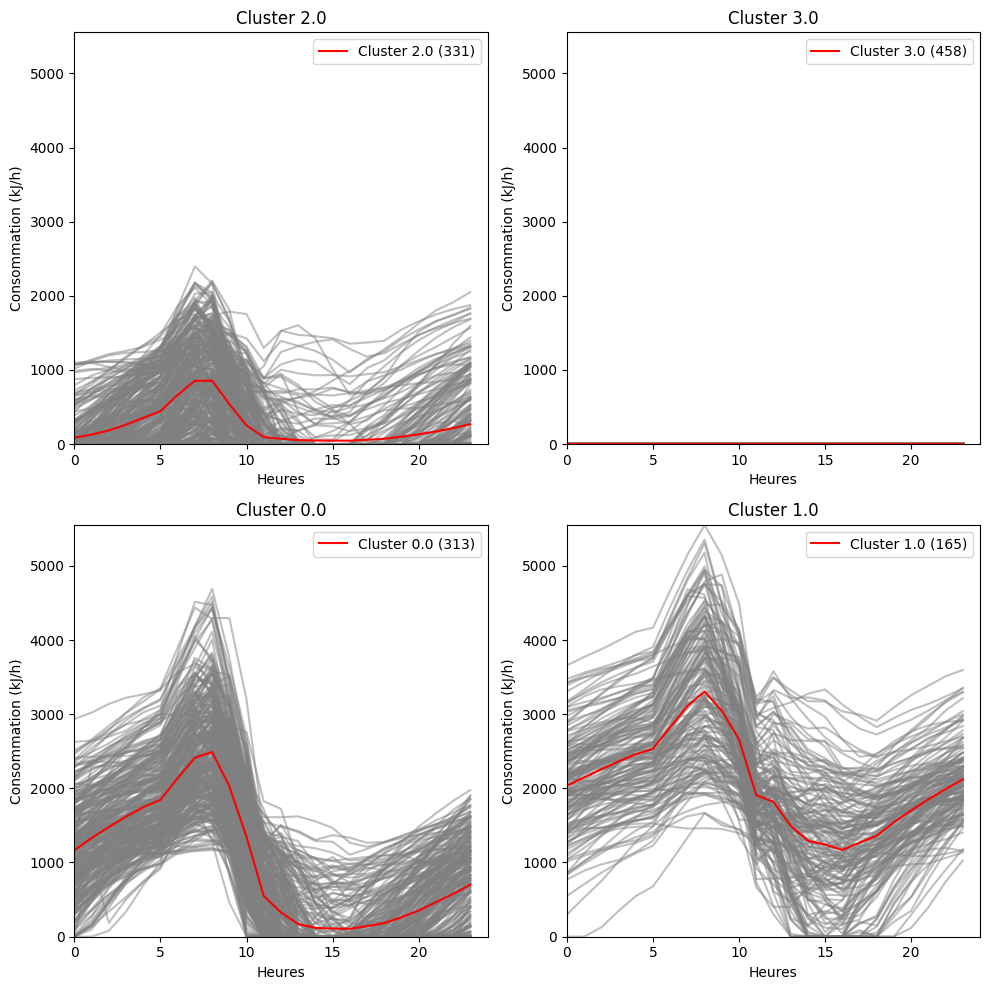

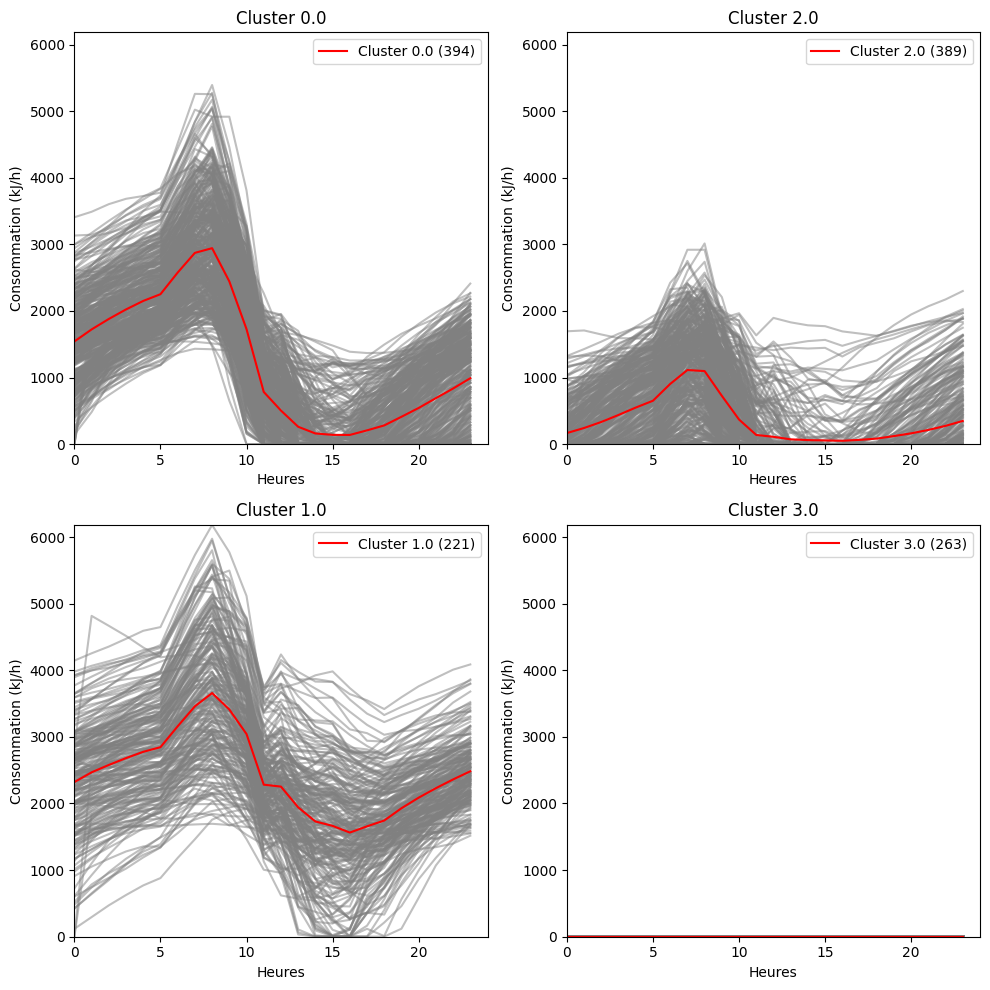

In [18]:
plot_clusters(clustering_heat_T18.drop(columns=["heat_on","Date","cluster_reel"]))
plot_clusters(clustering_heat_T20.drop(columns=["heat_on","Date","cluster_reel"]))
